In [25]:
import numpy as np
import matplotlib.pyplot as plt

In [26]:
%matplotlib inline

## Problem 1
Write a function which implements Euler's method. Test your function on the IVP:
$$\begin{align}
	\begin{split}
		x' (t)&= x(t) - 2t + 4,\quad 0 \leq t \leq 2, \\
		x(0) &= 0,
	\end{split}
\end{align}$$

where the analytic solution is $x(t) = -2+2t + 2e^t$.

Use the Euler method to numerically approximate the solution with step sizes $h = 0.2, 0.1$, and $0.05.$  Plot the true solution alongside the three approximations.

In [27]:
def euler(f,x0,t,h):
    """Numerically approximates the solution to the IVP:
    
    x'(t) = f(x(t),t)
    x(t0) = x0
    
    using the Euler method.
    Parameters:
        f (function): The right-hand side of the ODE
        x0 ((m,) ndarray): The initial condition
        t ((n,) ndarray): The array of time values
    Returns:
        ((n,m) ndarray): The approximate solution, where x[i] ≈ x(t_i)
    """
    #Alice I thought about you and put this comment
    #set initial values
    X = [x0]
    i = 1
    #update values of x and create and return an array
    for j in range(1,len(t)):
        xi  = x0 + h*f(x0,t[j-1])
        X.append(xi)
        x0 = xi
    return X

    #raise NotImplementedError("Problem 1 Incomplete")

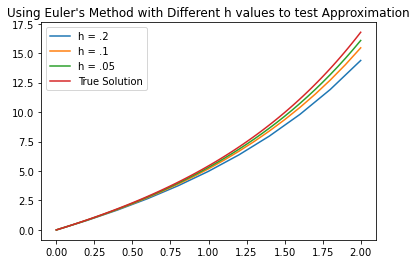

In [28]:
#define f and initial values
f = lambda x,t: x - 2*t + 4
x0 = 0
#set h,t and plot for h=.2
h = .2
t = np.linspace(0,2,int(2/h)+1)
plt.plot(t,euler(f,x0,t,h), label = 'h = .2')

#set h,t and plot for h=.1
h = .1
t = np.linspace(0,2,int(2/h)+1)
plt.plot(t,euler(f,x0,t,h), label = 'h = .1')

#set h,t and plot for h=.05
h = .05
t = np.linspace(0,2,int(2/h)+1)
plt.plot(t,euler(f,x0,t,h), label = 'h = .05')

#plot the true solution
t = np.linspace(0,2,100)
x = lambda t: -2 + 2*t + 2*np.exp(t)
plt.plot(t,x(t),label = 'True Solution')

plt.title("Using Euler's Method with Different h values to test Approximation")
plt.legend()
plt.show()

## Problem 2

Write functions that implement the midpoint and fourth-order Runge-Kutta methods. Then, consider again the IVP from Problem 1. Use the Euler, Midpoint, and RK4 methods to approximate the value of the solution for step sizes of $h = 0.2,$ $ 0.1,$ $0.05 $, $0.025,$ and $0.0125.$ Plot the true solution alongside the approximation obtained from each method when $h=0.2$. Then, use `plt.loglog` to create a log-log plot of the relative error $|x(2)-x_n|/{|x(2)|}$ as a function of $h$ for each approximation.

In [44]:
def midpoint(f,x0,t,h):
    """Numerically approximates the solution to the IVP:
    
    x'(t) = f(x(t),t)
    x(t0) = x0
    
    using the midpoint method.
    Parameters:
        f (function): The right-hand side of the ODE
        x0 ((m,) ndarray): The initial condition
        t ((n,) ndarray): The array of time values
    Returns:
        ((n,m) ndarray): The approximate solution, where x[i] ≈ x(t_i)
    """
    #set initial values
    X = [x0]
    i = 1
    #update values of x and create and return an array
    for j in range(1,len(t)):
        xi  = x0 + h*f(x0 + (h/2)*f(x0,t[j-1]),t[j-1] + (h/2))
        X.append(xi)
        x0 = xi
    return X
    #raise NotImplementedError("Problem 2 Incomplete")

def rk4(f,x0,t,h):
    """Numerically approximates the solution to the IVP:
    
    x'(t) = f(x(t),t)
    x(t0) = x0
    
    using a fourth-order Runge-Kutta method.
    Parameters:
        f (function): The right-hand side of the ODE
        x0 ((m,) ndarray): The initial condition
        t ((n,) ndarray): The array of time values
    Returns:
        ((n,m) ndarray): The approximate solution, where x[i] ≈ x(t_i)
    """
    #set initial values
    X = [x0]
    i = 1
    #update values of x and create and return an array
    for j in range(1,len(t)):
        k1 = f(x0,t[j-1])
        k1 = np.array(k1)
        k2 = f(x0 + (h/2)*k1,t[j-1] + (h/2))
        k2 = np.array(k2)
        k3 = f(x0 + (h/2)*k2, t[j-1] + (h/2))
        k3 = np.array(k3)
        k4 = f(x0 + h*k3, t[j])
        k4 = np.array(k4)
        xi = x0 + (h/6)*(k1 + 2*k2 + 2*k3 + k4)
        xi = np.array(xi)
        X.append(xi)
        x0 = xi
    return X
    #raise NotImplementedError("Problem 2 Incomplete")

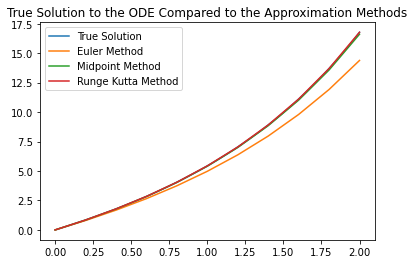

In [45]:
#define f and initial values
f = lambda x,t: x - 2*t + 4
x0 = 0

#plot the true solution
t = np.linspace(0,2,100)
x = lambda t: -2 + 2*t + 2*np.exp(t)
plt.plot(t,x(t),label = 'True Solution')

#set h,t and plot for h=.2
h = .2
t = np.linspace(0,2,int(2/h)+1)
plt.plot(t,euler(f,x0,t,h), label = 'Euler Method')

#plot midpoint method
plt.plot(t,midpoint(f,x0,t,h), label = 'Midpoint Method')

#plot Runge Kutta method
plt.plot(t,rk4(f,x0,t,h), label = "Runge Kutta Method")

plt.title("True Solution to the ODE Compared to the Approximation Methods")
plt.legend()
plt.show()

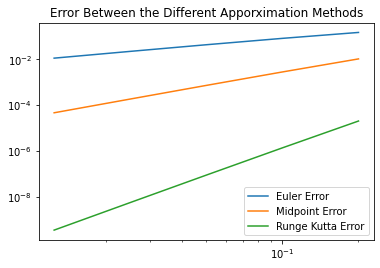

In [46]:
#define initial conditions
x = lambda t: -2 + 2*t + 2*np.exp(t)
error = lambda xn: np.abs(x(2) - xn)/np.abs(x(2))
euler_error = []
rk_error = []
midpoint_error = []
f = lambda x,t: x - 2*t + 4
x0 = 0

#find midpoint, Euler, and runge kutta error values for h=.2
h = .2
t = np.linspace(0,2,int(2/h)+1)
e2= euler(f,x0,t,h)
euler_error.append(error(e2[-1]))
rk2 = rk4(f,x0,t,h)
rk_error.append(error(rk2[-1]))
md2 = midpoint(f,x0,t,h)
midpoint_error.append(error(md2[-1]))

#find midpoint, Euler, and runge kutta error values for h=.1
h = .1
t = np.linspace(0,2,int(2/h)+1)
e2= euler(f,x0,t,h)
euler_error.append(error(e2[-1]))
rk2 = rk4(f,x0,t,h)
rk_error.append(error(rk2[-1]))
md2 = midpoint(f,x0,t,h)
midpoint_error.append(error(md2[-1]))

#find midpoint, Euler, and runge kutta error values for h=.05
h = .05
t = np.linspace(0,2,int(2/h)+1)
e2= euler(f,x0,t,h)
euler_error.append(error(e2[-1]))
rk2 = rk4(f,x0,t,h)
rk_error.append(error(rk2[-1]))
md2 = midpoint(f,x0,t,h)
midpoint_error.append(error(md2[-1]))

#find midpoint, Euler, and runge kutta error values for h=.025
h = .025
t = np.linspace(0,2,int(2/h)+1)
e2= euler(f,x0,t,h)
euler_error.append(error(e2[-1]))
rk2 = rk4(f,x0,t,h)
rk_error.append(error(rk2[-1]))
md2 = midpoint(f,x0,t,h)
midpoint_error.append(error(md2[-1]))

#find midpoint, Euler, and runge kutta error values for h=.0125
h = .0125
t = np.linspace(0,2,int(2/h)+1)
e2= euler(f,x0,t,h)
euler_error.append(error(e2[-1]))
rk2 = rk4(f,x0,t,h)
rk_error.append(error(rk2[-1]))
md2 = midpoint(f,x0,t,h)
midpoint_error.append(error(md2[-1]))

#plot all the error values on a log log scale
h = [.2,.1,.05,.025,.0125]
plt.loglog(h,euler_error,label = "Euler Error")
plt.loglog(h,midpoint_error, label = "Midpoint Error")
plt.loglog(h,rk_error,label = "Runge Kutta Error")
plt.title("Error Between the Different Apporximation Methods")          
plt.legend()
plt.show()

## Problem 3

Use the RK4 method to solve for the simple harmonic oscillator satisfying:
$$\begin{align}
	\begin{split}
&{}my'' + ky = 0,\quad 0 \leq t \leq 20, \\
&{}y(0) = 2, \quad
y'(0) = -1,
	\end{split}
\end{align}$$

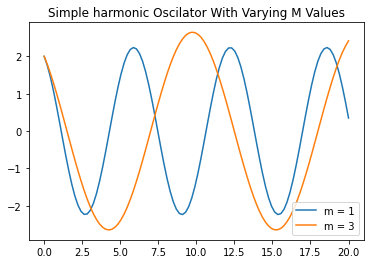

In [70]:
#set initial values
m = 1
k = 1
t = np.linspace(0,20,100)
h = .2
x0 = [2,-1]
#define f
f = lambda x,t: [x[1],(-k/m)*x[0]]
X = rk4(f,x0,t,h)
X = np.array(X)
#plot for m = 1
plt.plot(t,X[:,0], label = "m = 1")
#plot for m=3
m = 3
X = rk4(f,x0,t,h)
X = np.array(X)
plt.plot(t,X[:,0], label = "m = 3")
plt.legend()
plt.title("Simple harmonic Oscilator With Varying M Values")
plt.show()

## Problem 4

Use the RK4 method to solve for the damped free harmonic oscillator satisfying 
$$\begin{align*}
&{}y'' +\gamma y'+ y = 0, \quad 0 \leq t \leq 20,\\
&{}y(0) = 1, \quad
y'(0) = -1.
\end{align*}$$
For $\gamma = 1/2,$ and $\gamma = 1$, simultaneously plot your numerical approximations of $y$.

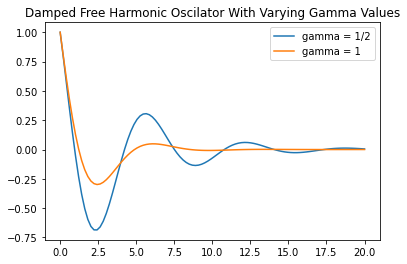

In [72]:
#define our initial values
gamma = 1/2
m = 1
k = 1
mu = np.sqrt(4*k*m - gamma**2)/(2*m)
t = np.linspace(0,20,100)
x0 = [1,-1]
h = .2

#define f with our given differential equation
f = lambda x,t: [x[1],((-k*x[0] - gamma*x[1])/m)]

#find solution and plot for gamma = 1/2
X = rk4(f,x0,t,h)
X = np.array(X)
plt.plot(t,X[:,0], label = 'gamma = 1/2')

#find solution and plot for gamma = 1
gamma = 1
X = rk4(f,x0,t,h)
X = np.array(X)
plt.plot(t,X[:,0], label = 'gamma = 1')
plt.legend()
plt.title("Damped Free Harmonic Oscilator With Varying Gamma Values")
plt.show()
#the analytic solution
#plt.plot(t,f(t))

## Problem 5

Use the RK4 method to solve for the damped and forced harmonic oscillator satisfying 
\begin{align}
	\begin{split}
&{}2y'' + \gamma y' + 2y = 2 \cos (\omega t), \quad 0 \leq t \leq 40,\\
&{}y(0) = 2, \quad
y'(0) = -1. 
	\end{split}
	\label{ivp:damped_forced_oscillator}
\end{align}
For the following values of $\gamma$ and $\omega,$ plot your numerical approximations of $y(t)$: $(\gamma, \omega) = (0.5, 1.5),$ $(0.1, 1.1),$ and $(0, 1)$.

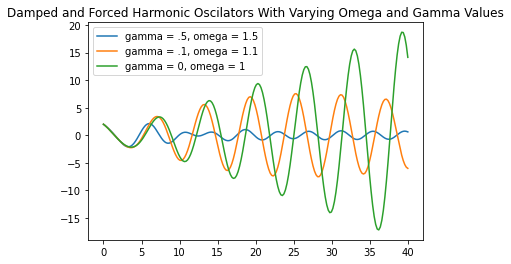

In [78]:
#define initial values
x0 = [2,-1]
h = .2
t = np.linspace(0,40,200)
f = lambda x,t: [x[1], (2*np.cos(w*t) - 2*x[0] - gamma*x[1])/2]

#plot for gamma = .5, omega = 1.5
gamma = 1/2
w = 3/2
X = rk4(f,x0,t,h)
X = np.array(X)
plt.plot(t,X[:,0], label = 'gamma = .5, omega = 1.5')

#plot for gamma = .1, omega = 1.1
gamma = .1
w = 1.1
X = rk4(f,x0,t,h)
X = np.array(X)
plt.plot(t,X[:,0], label = 'gamma = .1, omega = 1.1')

#plot for gamma = 0, omega = 1
gamma = 0
w = 1
X = rk4(f,x0,t,h)
X = np.array(X)
plt.plot(t,X[:,0], label = 'gamma = 0, omega = 1')

plt.legend()
plt.title("Damped and Forced Harmonic Oscilators With Varying Omega and Gamma Values")
plt.show()

In [79]:
#Alice I thought about you and put this comment